# SI 618: Correlation and Regression

Version 2021.02.16.1.CT

Correlation does not imply causation!

![](https://github.com/umsi-data-science/si370/raw/master/resources/piratesvstemp.png)

http://mpastell.com/2013/04/19/python_regression/

## Wine quality redux
![](https://github.com/umsi-data-science/si370/raw/master/resources/vinho.png)
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home

Warnings usually just cause us unnessary stress. The next code block silences warnings. 
 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
wine = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/si370/master/data/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Remember creating a pairplot for the wine dataset?

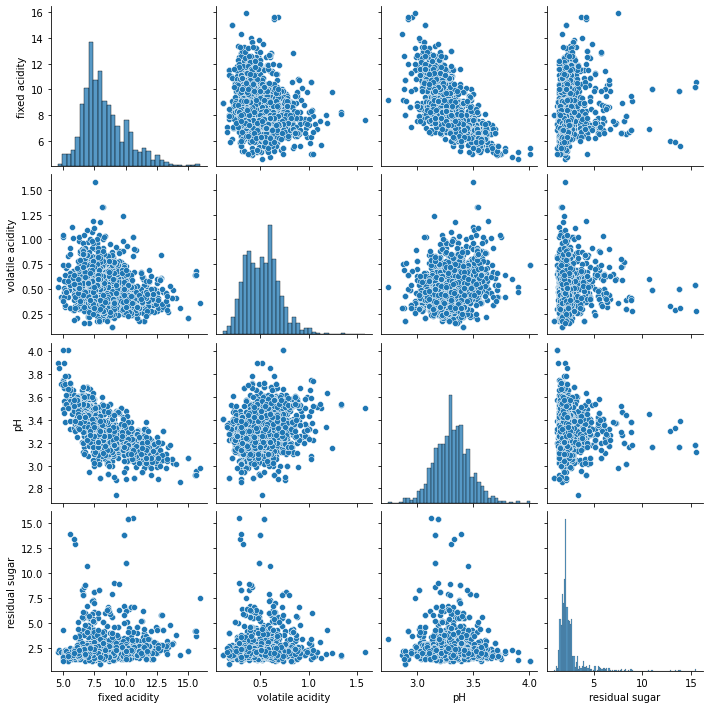

In [4]:
# pairplot
sns.pairplot(wine,vars = ['fixed acidity','volatile acidity','pH','residual sugar'])

## Correlation

We can also look at the correlation between those variables.  From [Wikipedia](https://en.wikipedia.org/wiki/Correlation_and_dependence):
> In the broadest sense correlation is any statistical association, though in common usage it most often refers to how close two variables are to having a linear relationship with each other...
> Correlations are useful because they can indicate a predictive relationship that can be exploited in practice.

Correlation coefficient can range from -1 to 1 and represent the degree to which and how
two variables are related.  Here's a visualization of a range of correlation coefficients:

![](https://github.com/umsi-data-science/si370/raw/master/resources/correlation1-1.png)

In [5]:
# to calculate all possible correlation coefficients in a dataframe
# corr()
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


A heatmap is a really useful visualization technique for large correlation matrices:

<AxesSubplot:>

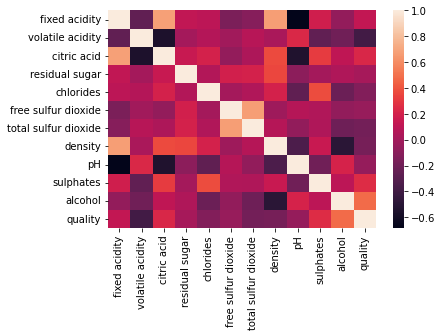

In [7]:
# heatmap
sns.heatmap(wine.corr())

We can also use a different type of color palette to highlight the differences:

<AxesSubplot:>

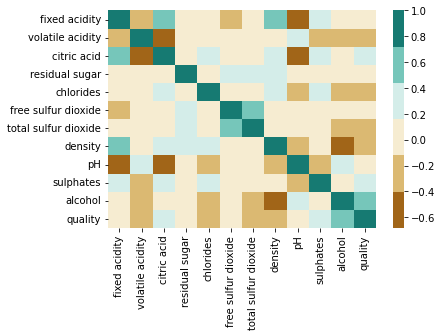

In [10]:
sns.heatmap(wine.corr(),cmap=sns.color_palette("BrBG"))

Recall we used JointGrid to create a regplot and histplot on the same plot.  We can take a 
closer look at that now:

In [11]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

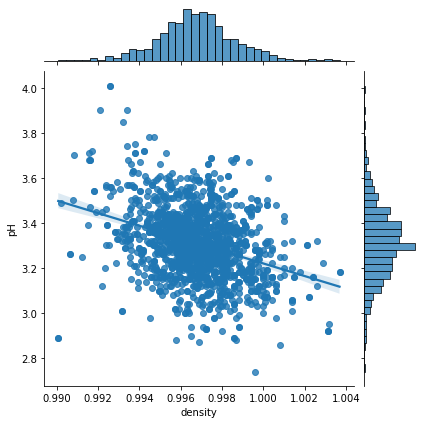

In [13]:
# JointGrid
g = sns.JointGrid(data=wine,x='density',y='pH')
g = g.plot(sns.regplot, sns.histplot)

## Ordinary Least Squares (OLS) Regression

We can get a lot more detail about the regression model by using statsmodels

In [14]:
# statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

statsmodels uses R-Style formulas: y ~ x1 + x2 + x3 + ...

1. y represents the outcome/dependent variable
2. x1, x2, x3, etc represent explanatory/independent variables 

In [17]:
model0 = smf.ols(" pH ~ density", data=wine).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     211.1
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           5.12e-45
Time:                        11:30:35   Log-Likelihood:                 818.29
No. Observations:                1599   AIC:                            -1633.
Df Residuals:                    1597   BIC:                            -1622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.1716      1.917     16.256      0.000      27.411      34.933
density      -27.9515      1.924    -14.530      0.000     -31.725     -24.178
==============================================================================
Omnibus:                       25.164   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.630
Skew:                           0.094   Prob(JB):                     5.53e-10
Kurtosis:                       3.778   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above example, the $r^2$ value is 0.117, which means the model explains about 11.7% of the variance (which isn't great).  However, the model is statistically significant (the p-value, called "Prob (F-statistic)" in the output, is less than 0.05).
The estimates for the parameters of the model are also statistically significant, which means we can use the equation:

pH = -27.9515 * density + 31.1716

to predict the value of pH given a value for density.

What happens when the series name has a space (or other special character) in it?  Use the 'Q' function to "Quote" the name:

In [18]:
#  'Q' function to "Quote" the name
model1 = smf.ols(" Q('fixed acidity') ~ density", data=wine).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('fixed acidity')   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     1287.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):          3.07e-207
Time:                        11:46:01   Log-Likelihood:                -2682.5
No. Observations:                1599   AIC:                             5369.
Df Residuals:                    1597   BIC:                             5380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -605.9599     17.122    -35.391      0.000    -639.543    -572.376
density      616.2845     17.178     35.877      0.000     582.591     649.978
==============================================================================
Omnibus:                      107.325   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.211
Skew:                           0.643   Prob(JB):                     5.31e-29
Kurtosis:                       3.549   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


.

## Outlier detection

"Outlier detection" refers to the identification of points that are extreme in value.  They may or may not influence the regression analysis.

Outlier: Large residual (i.e. big differences on the vertical dimension)

Leverage: Extreme value of predictor variable (i.e. big differences on the horizontal dimension)

Influence: Removing observation substantially changes estimate of coefficients


Consider the following cases, drawn from 

http://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/

In the first case, there are no notable points:

In [20]:
np.random.seed(0) # seed the random number generator so we always get the same results
x1 = np.random.normal(20, 3, 20) # create a random normal distribution of 20 points, 
                                 # centered on 20, standard deviation of 3
y0 = 5 + 0.5 * x1 # create a corresponding y variable that is exactly 5 + 0.5 * x
y1 = 5 + 0.5 * x1 + np.random.normal(0, 1, 20) # create a corresponding y variable that is 5 + 0.5 * x 
                                               # plus some random noise drawn from a normal distribution
demo = pd.DataFrame({'x1':x1, 'y0':y0, 'y1':y1})
lm = sm.OLS(y1, sm.add_constant(x1)).fit()
# smf is preferred
lm1 = smf.ols(" y1 ~ x1", data=demo).fit()
print("The rsquared value is " + str(lm.rsquared))


The rsquared value is 0.5759696028216693


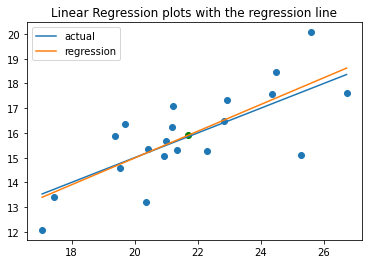

In [21]:
# using df
plt.scatter(np.sort(demo.x1), demo.y1[np.argsort(demo.x1)])
plt.scatter(np.mean(demo.x1), np.mean(demo.y1), color = "green")
plt.plot(np.sort(demo.x1), demo.y0[np.argsort(demo.x1)], label = "actual")
plt.plot(np.sort(demo.x1), lm.predict()[np.argsort(demo.x1)], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

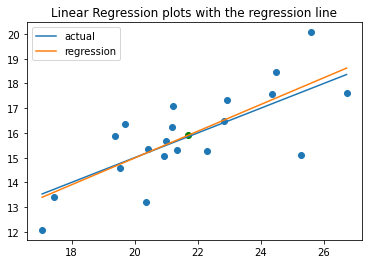

In [22]:
# equivalently, without using DataFrames
# using numpy array (cleaner
plt.scatter(np.sort(x1), y1[np.argsort(x1)])
plt.scatter(np.mean(x1), np.mean(y1), color = "green")
plt.plot(np.sort(x1), y0[np.argsort(x1)], label = "actual")
plt.plot(np.sort(x1), lm.predict()[np.argsort(x1)], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

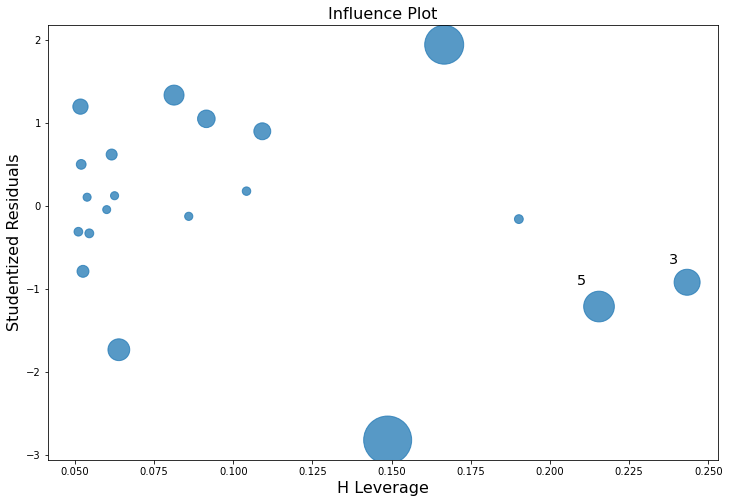

In [24]:
# influence_plot

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.00005, ax = ax, criterion="cooks")

High leverage point, no outliers

In [30]:
# High leverage point, no outliers

The rsquared value is 0.6835270587597565


[]

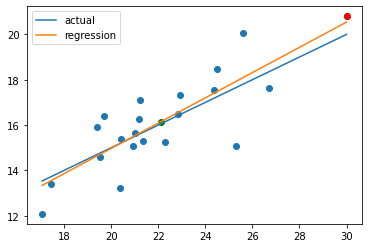

In [27]:
# add a leverage point
x2 = np.r_[x1, 30]
y2 = np.r_[y1, 20.8]
y20 = np.r_[y0, 20] # 20 = 30*0.5+5

# regression using sm model
lm2 = sm.OLS(y2, sm.add_constant(x2)).fit()
print("The rsquared value is " + str(lm2.rsquared))

#plot
plt.scatter(np.sort(x2), y2[np.argsort(x2)]) # with noise scatter
plt.scatter(30, 20.8, color = "red")
plt.scatter(np.mean(x2), np.mean(y2), color = "green") 
plt.plot(np.sort(x2), y20[np.argsort(x2)], label = "actual") # no noise regression line
plt.plot(np.sort(x2), lm2.predict()[np.argsort(x2)], label = "regression") # predict regrssion line with noise
plt.legend()
plt.plot()


* the regression line is changed a little bit

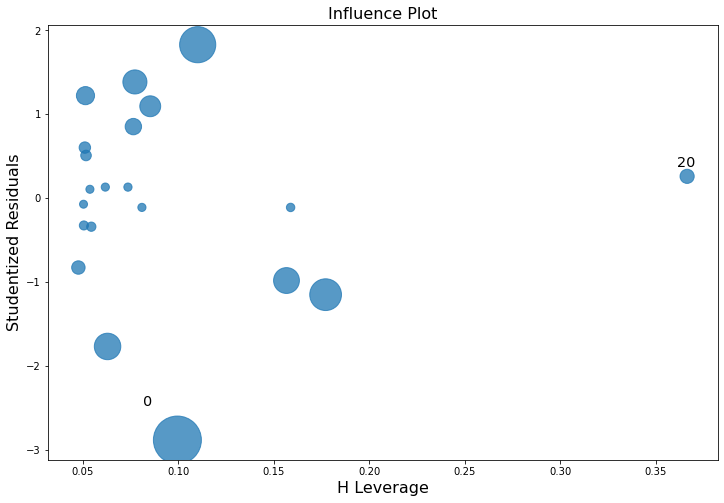

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm2, ax= ax, criterion="cooks")

Outlier, no leverage

In [32]:
# Outlier, no leverage

The rsquared value is 0.2737752662801516


[]

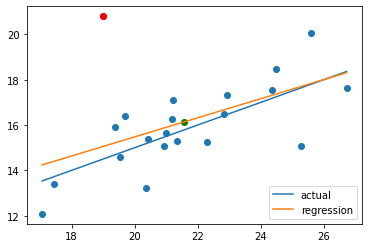

In [33]:
x3 = np.r_[x1, 19]
y3 = np.r_[y1, 20.8]
y30 = np.r_[y0, 5 + .5 * 19]

lm3 = sm.OLS(y3, sm.add_constant(x3)).fit()
print("The rsquared value is " + str(lm3.rsquared))

plt.scatter(np.sort(x3), y3[np.argsort(x3)])
plt.scatter(19, 20.8, color = "red")
plt.scatter(np.mean(x3), np.mean(y3), color = "green")
plt.plot(np.sort(x3), y30[np.argsort(x3)], label = "actual")
plt.plot(np.sort(x3), lm3.predict()[np.argsort(x3)], label = "regression")
plt.legend()
plt.plot()

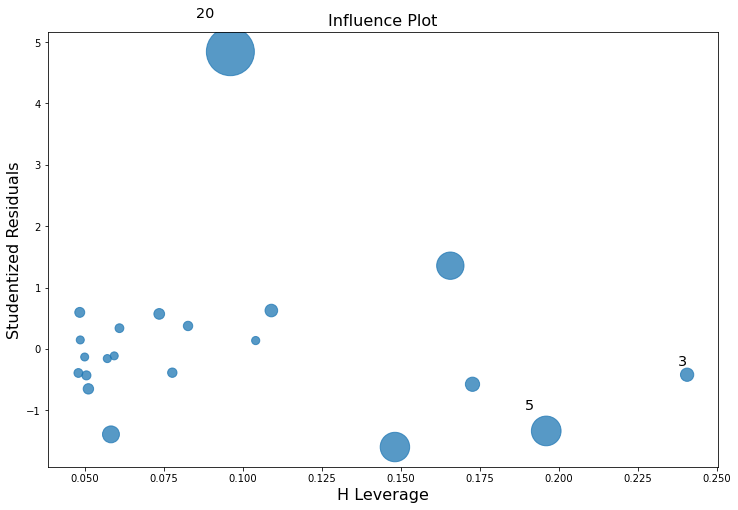

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm3, ax= ax, criterion="cooks")

Outlier and leverage point

In [35]:
# Outlier and leverage point


The rsquared value is 0.028865535723009983


[]

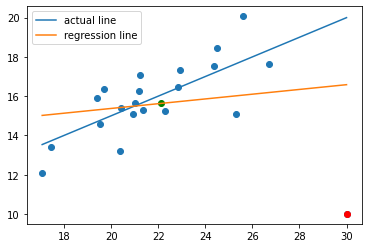

In [36]:
x4 = np.r_[x1, 30]
y4 = np.r_[y1, 10]
y40 = np.r_[y0, 20]

lm4 = sm.OLS(y4, sm.add_constant(x4)).fit()
print("The rsquared value is " + str(lm4.rsquared))

plt.scatter(np.sort(x4), y4[np.argsort(x4)])
plt.scatter(30, 10, color = "red")
plt.scatter(np.mean(x4), np.mean(y4), color = "green")
plt.plot(np.sort(x4), y40[np.argsort(x4)], label = "actual line")
plt.plot(np.sort(x4), lm4.predict()[np.argsort(x4)], label = "regression line")
plt.legend()
plt.plot()

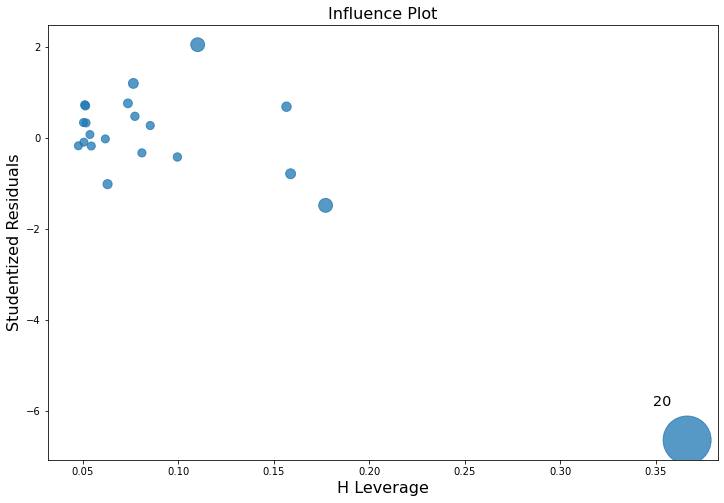

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm4, ax= ax, criterion="cooks")

Let's look at Anscombe's Quartet:

In [38]:
# Anscombe's Quartet:

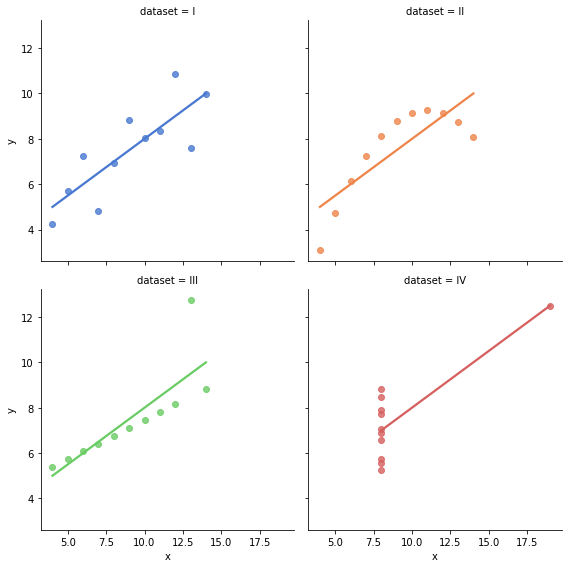

In [40]:
anscombe = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", height=4)

In [41]:
anscombe.sample(10)


,dataset,x,y
29,III,4.0,5.39
37,IV,8.0,8.47
10,I,5.0,5.68
31,III,7.0,6.42
8,I,12.0,10.84
27,III,14.0,8.84
22,III,10.0,7.46
7,I,4.0,4.26
39,IV,8.0,5.25
34,IV,8.0,5.76


In [42]:
anscombe_1 = anscombe[anscombe.dataset == 'I']
anscombe_2 = anscombe[anscombe.dataset == 'II']
anscombe_3 = anscombe[anscombe.dataset == 'III']
anscombe_4 = anscombe[anscombe.dataset == 'IV']

The rsquared value is 0.666542459508775


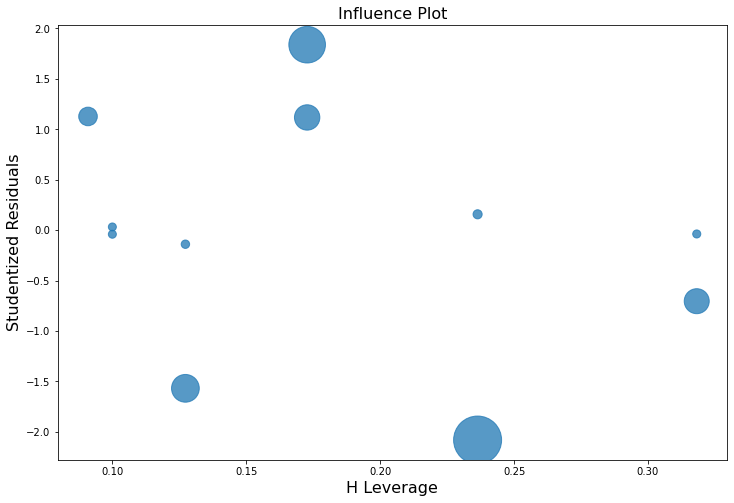

In [44]:
anscombe_1_lm = smf.ols('y ~ x',anscombe_1).fit()
print("The rsquared value is " + str(anscombe_1_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_1_lm, ax= ax, criterion="cooks",alpha=0.05)
                                     
                                     

The rsquared value is 0.6662420337274844


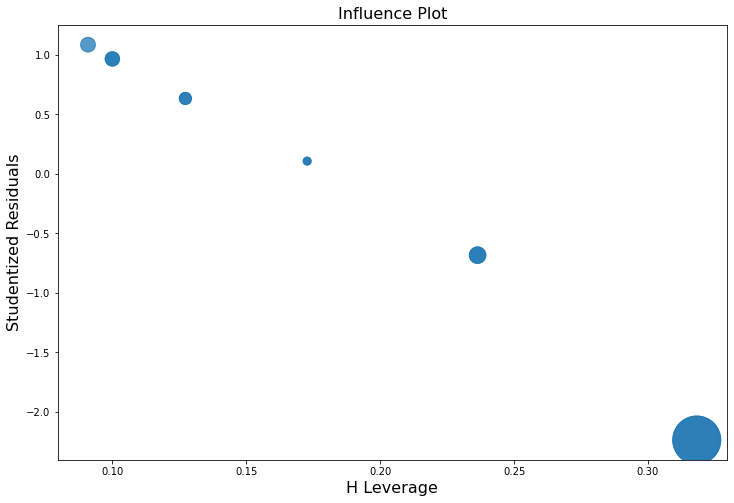

In [45]:
anscombe_2_lm = smf.ols('y ~ x',anscombe_2).fit()
print("The rsquared value is " + str(anscombe_2_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_2_lm, ax= ax, criterion="cooks",alpha=.05)
                                     
                                     

The rsquared value is 0.6663240410665593


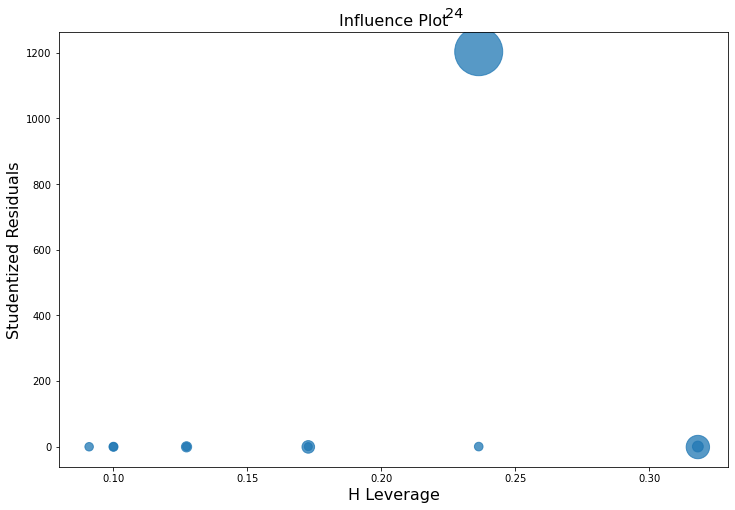

In [46]:
anscombe_3_lm = smf.ols('y ~ x',anscombe_3).fit()
print("The rsquared value is " + str(anscombe_3_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_3_lm, ax= ax, criterion="cooks",alpha=0.05)
                                     
                                     

In [47]:
anscombe_4.head(10)

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91


The rsquared value is 0.6667072568984653


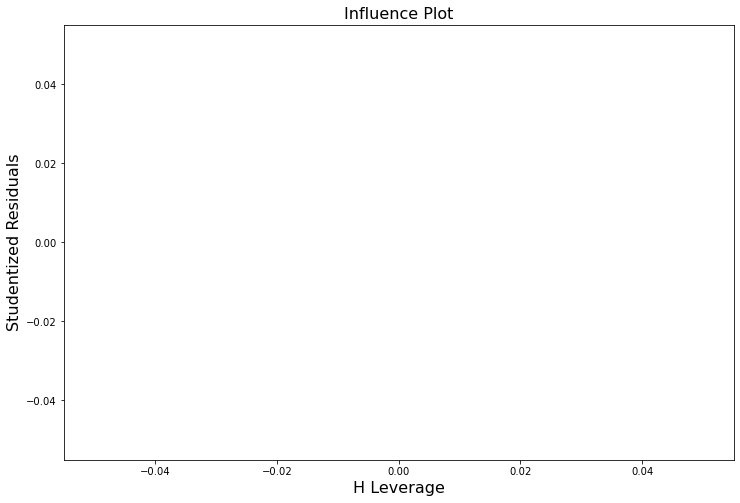

In [48]:
anscombe_4_lm = smf.ols('y ~ x',anscombe_4).fit()
print("The rsquared value is " + str(anscombe_4_lm.rsquared))
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(anscombe_4_lm, ax= ax, criterion="cooks",alpha=0.05)
                                     
                                     

In [50]:
# get_influence()
infl = anscombe_3_lm.get_influence()
sm_fr = infl.summary_frame()
sm_fr

,dfb_Intercept,dfb_x,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
22,-0.004626,-4.412673e-02,0.011765,-0.460177,0.100000,-0.153392,-0.439055,-0.146352
23,-0.037133,1.864368e-02,0.002141,-0.196333,0.100000,-0.065444,-0.185502,-0.061834
24,-357.909597,5.252677e+02,1.392849,2.999992,0.236364,1.669041,1203.539464,669.587544
25,-0.032900,4.913856e-15,0.005473,-0.330851,0.090909,-0.104624,-0.313844,-0.099246
26,0.049155,-1.172274e-01,0.025984,-0.596951,0.127273,-0.227964,-0.574295,-0.219312
27,0.489742,-6.674064e-01,0.300571,-1.134972,0.318182,-0.775333,-1.155982,-0.789686
28,0.027001,-2.088417e-02,0.000518,0.070416,0.172727,0.032176,0.066407,0.030344
29,0.240903,-2.089150e-01,0.033817,0.380699,0.318182,0.260067,0.361851,0.247192
30,0.137434,-2.313597e-01,0.059536,-0.755177,0.172727,-0.345068,-0.735677,-0.336158
31,-0.019702,1.342485e-02,0.000355,-0.069739,0.127273,-0.026632,-0.065768,-0.025116


We can also extract the Cook's Distance values and their associated p-values from the influence object:

In [53]:
#  Cook's Distance  and dffits are helpful to detect outliers in datasets

In [54]:
c,p = infl.cooks_distance

and create a DataFrame with the results

In [56]:
df = pd.DataFrame.from_dict({'cooks_distance':c,'pvalue':p})
df

,cooks_distance,pvalue
0,0.011765,0.988319
1,0.002141,0.997861
2,1.392849,0.297161
3,0.005473,0.994545
4,0.025984,0.974424
5,0.300571,0.747547
6,0.000518,0.999483
7,0.033817,0.966870
8,0.059536,0.942570
9,0.000355,0.999645


Note that we could sort the above in various, helpful ways.